In [9]:
import numpy as np

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [11]:
import pandas as pd
df = pd.read_csv("baseball.csv")

In [12]:
df

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424
5,CHW,AL,2012,748,676,85,0.318,0.422,0.255,0,NaN,NaN,162,0.319,0.405
6,CIN,NL,2012,669,588,97,0.315,0.411,0.251,1,2.0,4.0,162,0.305,0.390
7,CLE,AL,2012,667,845,68,0.324,0.381,0.251,0,NaN,NaN,162,0.336,0.430
8,COL,NL,2012,758,890,64,0.330,0.436,0.274,0,NaN,NaN,162,0.357,0.470
9,DET,AL,2012,726,670,88,0.335,0.422,0.268,1,6.0,2.0,162,0.314,0.402


In [13]:
df.describe()

,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
count,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,244.000000,244.000000,1232.000000,420.000000,420.000000
mean,1988.957792,715.081981,715.081981,80.904221,0.326331,0.397342,0.259273,0.198052,3.122951,2.717213,161.918831,0.332264,0.419743
std,14.819625,91.534294,93.079933,11.458139,0.015013,0.033267,0.012907,0.398693,1.738349,1.095234,0.624365,0.015295,0.026510
min,1962.000000,463.000000,472.000000,40.000000,0.277000,0.301000,0.214000,0.000000,1.000000,1.000000,158.000000,0.294000,0.346000
25%,1976.750000,652.000000,649.750000,73.000000,0.317000,0.375000,0.251000,0.000000,2.000000,2.000000,162.000000,0.321000,0.401000
50%,1989.000000,711.000000,709.000000,81.000000,0.326000,0.396000,0.260000,0.000000,3.000000,3.000000,162.000000,0.331000,0.419000
75%,2002.000000,775.000000,774.250000,89.000000,0.337000,0.421000,0.268000,0.000000,4.000000,4.000000,162.000000,0.343000,0.438000
max,2012.000000,1009.000000,1103.000000,116.000000,0.373000,0.491000,0.294000,1.000000,8.000000,5.000000,165.000000,0.384000,0.499000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 15 columns):
Team            1232 non-null object
League          1232 non-null object
Year            1232 non-null int64
RS              1232 non-null int64
RA              1232 non-null int64
W               1232 non-null int64
OBP             1232 non-null float64
SLG             1232 non-null float64
BA              1232 non-null float64
Playoffs        1232 non-null int64
RankSeason      244 non-null float64
RankPlayoffs    244 non-null float64
G               1232 non-null int64
OOBP            420 non-null float64
OSLG            420 non-null float64
dtypes: float64(7), int64(6), object(2)
memory usage: 144.5+ KB


In [15]:
df['RD'] = df['RS'] - df['RA']

In [16]:
df[['Team','Year','W','Playoffs','RS','RA','RD']]

,Team,Year,W,Playoffs,RS,RA,RD
0,ARI,2012,81,0,734,688,46
1,ATL,2012,94,1,700,600,100
2,BAL,2012,93,1,712,705,7
3,BOS,2012,69,0,734,806,-72
4,CHC,2012,61,0,613,759,-146
5,CHW,2012,85,0,748,676,72
6,CIN,2012,97,1,669,588,81
7,CLE,2012,68,0,667,845,-178
8,COL,2012,64,0,758,890,-132
9,DET,2012,88,1,726,670,56


In [17]:
x_df = ((df[df['Year'] < 2002]))   ##spliting data less than year 2002 to get the results of the playoff in 2002

In [18]:
x_df.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG,RD
330,ANA,AL,2001,691,730,75,0.327,0.405,0.261,0,NaN,NaN,162,0.331,0.412,-39
331,ARI,NL,2001,818,677,92,0.341,0.442,0.267,1,5.0,1.0,162,0.311,0.404,141
332,ATL,NL,2001,729,643,88,0.324,0.412,0.260,1,7.0,3.0,162,0.314,0.384,86
333,BAL,AL,2001,687,829,63,0.319,0.380,0.248,0,NaN,NaN,162,0.337,0.439,-142
334,BOS,AL,2001,772,745,82,0.334,0.439,0.266,0,NaN,NaN,161,0.329,0.393,27


[]

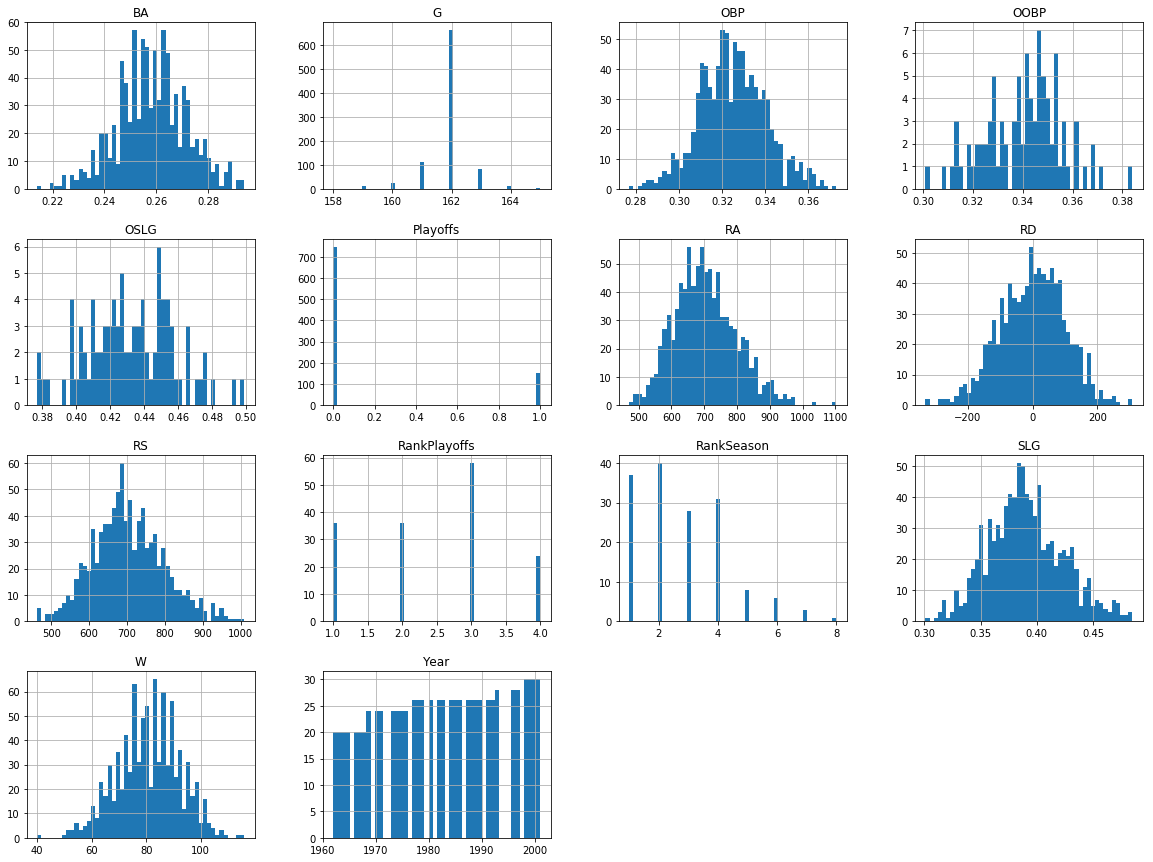

In [19]:
x_df.hist(bins=50,figsize=(20,15))
plt.plot()

# winning percentage fomula = rs x rs/((rs x rs)+(ra x ra))

In [42]:
from pandas.plotting import scatter_matrix

In [43]:
col =['RS','RA','RD','W','OBP','SLG','BA']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EB86D30710>,
      dtype=object)

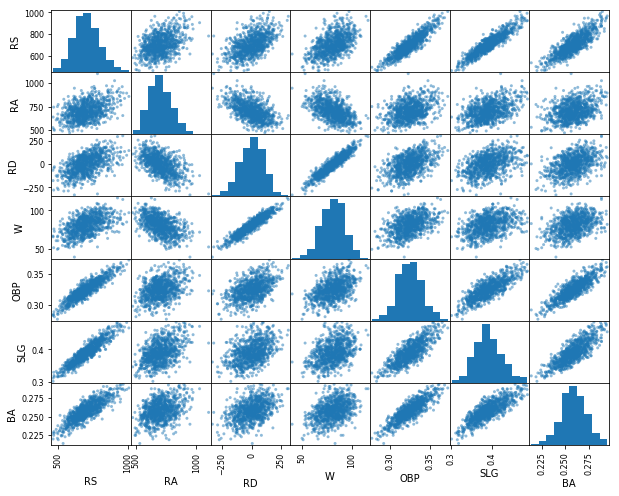

In [44]:
scatter_matrix(x_df[col],figsize=(10,8))

In [45]:
x_df['RankPlayoffs'].fillna(value= 0 , inplace= True)
x_df['OOBP'].fillna(value= 0 , inplace= True)
x_df['OSLG'].fillna(value= 0 , inplace= True)
x_df['RankSeason'].fillna(value= 0 , inplace= True)

C:\Users\hp\Anaconda\anaconda new\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


### CORELATONS

In [46]:
x_df

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG,RD
330,ANA,AL,2001,691,730,75,0.327,0.405,0.261,0,0.0,0.0,162,0.331,0.412,-39
331,ARI,NL,2001,818,677,92,0.341,0.442,0.267,1,5.0,1.0,162,0.311,0.404,141
332,ATL,NL,2001,729,643,88,0.324,0.412,0.260,1,7.0,3.0,162,0.314,0.384,86
333,BAL,AL,2001,687,829,63,0.319,0.380,0.248,0,0.0,0.0,162,0.337,0.439,-142
334,BOS,AL,2001,772,745,82,0.334,0.439,0.266,0,0.0,0.0,161,0.329,0.393,27
335,CHC,NL,2001,777,701,88,0.336,0.430,0.261,0,0.0,0.0,162,0.321,0.398,76
336,CHW,AL,2001,798,795,83,0.334,0.451,0.268,0,0.0,0.0,162,0.334,0.427,3
337,CIN,NL,2001,735,850,66,0.324,0.419,0.262,0,0.0,0.0,162,0.341,0.455,-115
338,CLE,AL,2001,897,821,91,0.350,0.458,0.278,1,6.0,4.0,162,0.341,0.417,76
339,COL,NL,2001,923,906,73,0.354,0.483,0.292,0,0.0,0.0,162,0.350,0.480,17


In [47]:
print(np.corrcoef(x_df.RD,x_df.W))

[[1.         0.93851498]
 [0.93851498 1.        ]]


In [48]:
print(np.corrcoef(x_df.SLG,x_df.RS))

[[1.         0.92638433]
 [0.92638433 1.        ]]


In [49]:
print(np.corrcoef(x_df.OBP,x_df.RS))

[[1.         0.90490915]
 [0.90490915 1.        ]]


In [50]:
print(np.corrcoef(x_df.BA,x_df.RS))

[[1.         0.83162475]
 [0.83162475 1.        ]]


In [51]:
 
x = x_df[['RD']].values
y = x_df[['W']].values  ###extracting data from the dataframe

In [52]:
W_model = LinearRegression()

In [53]:
W_model.fit(x,y)

print(W_model.intercept_)
print(W_model.coef_)

[80.88137472]
[[0.10576562]]


In [54]:
## W = 80.88 + 0.11 ×(RD)


In [55]:
# Extracting our variables from the dataframe.
x = x_df[['OBP','SLG']].values
y = x_df[['RS']].values

In [56]:
RS_model = LinearRegression()

In [57]:
RS_model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [58]:
print(RS_model.intercept_)
print(RS_model.coef_)

[-804.62706106]
[[2737.76802227 1584.90860546]]


In [59]:
# RS = -804.63+2737.77×(OBP)+1584.91×(SLG)

In [60]:
_x_df= ((x_df[x_df['Year'] > 1998]))   

In [61]:
_x_df

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG,RD
330,ANA,AL,2001,691,730,75,0.327,0.405,0.261,0,0.0,0.0,162,0.331,0.412,-39
331,ARI,NL,2001,818,677,92,0.341,0.442,0.267,1,5.0,1.0,162,0.311,0.404,141
332,ATL,NL,2001,729,643,88,0.324,0.412,0.260,1,7.0,3.0,162,0.314,0.384,86
333,BAL,AL,2001,687,829,63,0.319,0.380,0.248,0,0.0,0.0,162,0.337,0.439,-142
334,BOS,AL,2001,772,745,82,0.334,0.439,0.266,0,0.0,0.0,161,0.329,0.393,27
335,CHC,NL,2001,777,701,88,0.336,0.430,0.261,0,0.0,0.0,162,0.321,0.398,76
336,CHW,AL,2001,798,795,83,0.334,0.451,0.268,0,0.0,0.0,162,0.334,0.427,3
337,CIN,NL,2001,735,850,66,0.324,0.419,0.262,0,0.0,0.0,162,0.341,0.455,-115
338,CLE,AL,2001,897,821,91,0.350,0.458,0.278,1,6.0,4.0,162,0.341,0.417,76
339,COL,NL,2001,923,906,73,0.354,0.483,0.292,0,0.0,0.0,162,0.350,0.480,17


In [62]:
i = _x_df[['OOBP','OSLG']].values
j = _x_df[['RA']].values

In [63]:
RA_model = LinearRegression()

In [64]:
RA_model.fit(i,j)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [65]:
print(RA_model.intercept_)
print(RA_model.coef_)

[-837.37788861]
[[2913.59948582 1514.28595842]]


In [66]:
#RA = -837.38 + 2913.60 ×(OOBP) + 1514.29 ×(OSLG)

In [86]:
RS_model.predict([[0.354,0.455]])

array([[885.67623431]])

In [87]:
x=RS_model.predict([[0.354,0.455]])

In [88]:
RA_model.predict([[0.309,0.395]])

array([[661.06730608]])

In [89]:
y=RA_model.predict([[0.309,0.395]])

In [90]:
z_model=LinearRegression()

In [91]:
z_model =x-y

In [92]:
z_model

array([[224.60892823]])

In [93]:
W_model.predict([[224]])

array([[104.57287415]])

In [6]:
import seaborn as sns

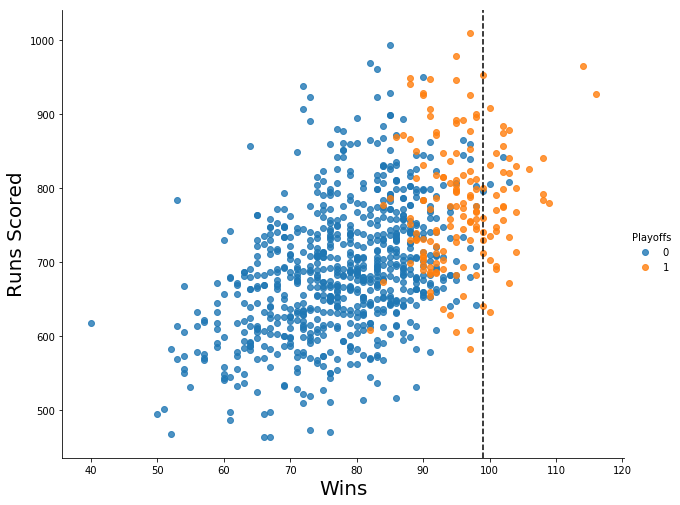

In [32]:
sns.lmplot(x = "W", y = "RS", fit_reg = False, hue = "Playoffs", data=x_df,height=7, aspect=1.25)
plt.xlabel("Wins", fontsize = 20)
plt.ylabel("Runs Scored", fontsize = 20)
plt.axvline(99, 0, 1, color = "Black", ls = '--')
plt.show()

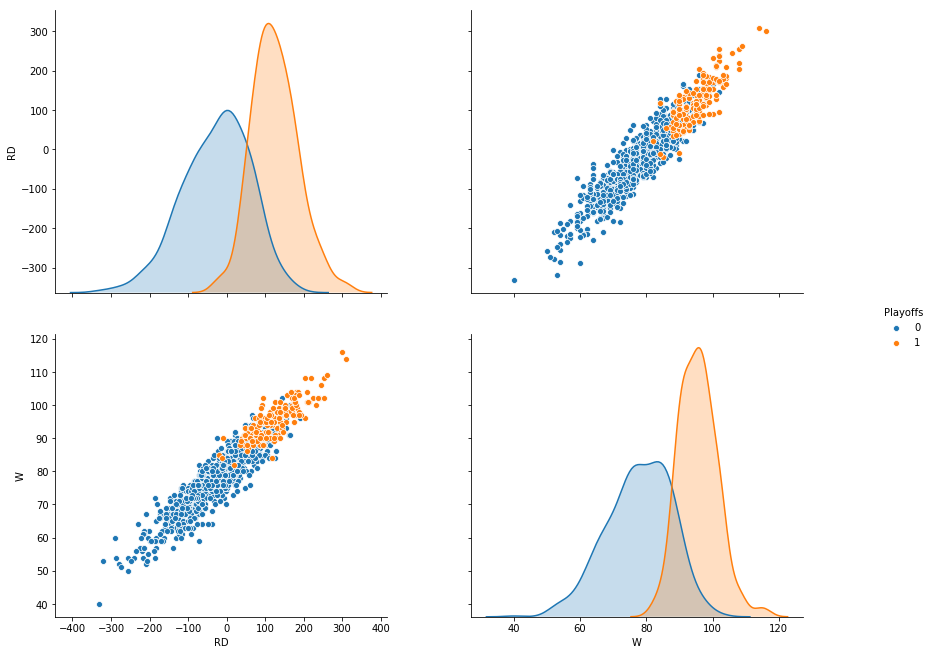

In [33]:
corrcheck = x_df[['RD', 'W', 'Playoffs']].copy()
g = sns.pairplot(corrcheck, hue = 'Playoffs',vars=["RD", "W"])
g.fig.set_size_inches(14,10)

In [37]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
 
#we use RD as the target column
X = x_df.iloc[:,6:9]
y = x_df.iloc[:,-1]
#apply SelectKBest class to get best features
bestfeatures = SelectKBest(score_func=chi2, k=3)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']
print(featureScores.nlargest(3,'Score'))

  Feature     Score
1     SLG  1.287945
0     OBP  0.361684
2      BA  0.311957


C:\Users\ELCOT\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.33553501 0.38644703 0.27801796]


Text(0, 0.5, 'Statistic')

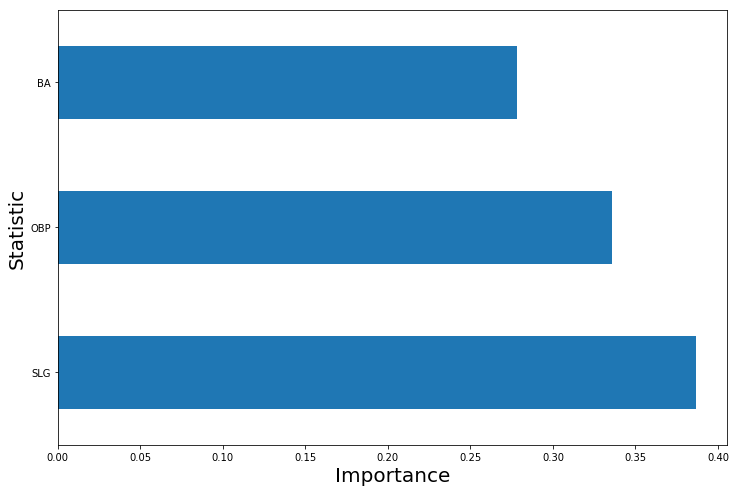

In [51]:
X = x_df.iloc[:,6:9]  #independent columns
y = x_df.iloc[:,-1]    #target column
from sklearn.ensemble import ExtraTreesClassifier
 
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(3).plot(kind='barh', figsize = (12,8))
plt.xlabel("Importance", fontsize = 20)
plt.ylabel("Statistic", fontsize = 20)